In [1]:
import os
from tensorboard.backend.event_processing import event_accumulator
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Pfad zum Hauptordner, der alle Konfigurationsordner enthält
main_folder = "./../../../runs/transfer44_info_part2_real_for_part1"

# Dictionary zum Speichern der Daten für jede Konfiguration
loss_train_dict = {}
psnr_val_dict = {}
sim_val_dict = {}
lin_dict = {}
lex_dict = {}
e_l_dict = {}
estimated_sigma_dict = {}

blacklist = ['n2info-pixel batchnorm fancy_1_13', 'n2info_part1_random loss_zero_recon']

# Durchlaufe alle Unterordner im Hauptordner
for config in os.listdir(main_folder):
    config_path = os.path.join(main_folder, config, "tensorboard")
    if os.path.isdir(config_path):
        if config in blacklist:
            print("Skipping: ", config)
            continue
        # Suche die TensorBoard-Datei (event file) im Ordner
        for file in os.listdir(config_path):
            if file.startswith("events.out.tfevents"):
                event_file = os.path.join(config_path, file)
                
                # Initialisiere den Event-Accumulator und lade die Daten
                ea = event_accumulator.EventAccumulator(event_file)
                ea.Reload()  # Daten laden
                print(ea.Tags()["scalars"])
                
                # Extrahiere die PSNR-Scalars
                #if 'Train PSNR [0,1] avg' in ea.Tags()["scalars"]:
                try:
                    values = ea.Scalars('Train Loss')#loss/train
                    
                    # Speichere die Werte und Steps in einem Dictionary
                    loss_train_dict[config] = {
                        "steps": [x.step for x in values],
                        "values": [x.value for x in values]
                    }
                except:
                    pass
                try:
                    values = ea.Scalars('PSNR/validation')
                    
                    # Speichere die Werte und Steps in einem Dictionary
                    psnr_val_dict[config] = {
                        "steps": [x.step for x in values],
                        "values": [x.value for x in values]
                    }
                except:
                    pass
                try:
                    values = ea.Scalars('sim/validation')
                    # Speichere die Werte und Steps in einem Dictionary
                    sim_val_dict[config] = {
                        "steps": [x.step for x in values],
                        "values": [x.value for x in values]
                    }
                except:
                    pass
                try:
                    values = ea.Scalars('e_l')
                    # Speichere die Werte und Steps in einem Dictionary
                    e_l_dict[config] = {
                        "steps": [x.step for x in values],
                        "values": [x.value for x in values]
                    }
                except:
                    pass
                try:
                    values = ea.Scalars('lex')
                    # Speichere die Werte und Steps in einem Dictionary
                    lex_dict[config] = {
                        "steps": [x.step for x in values],
                        "values": [x.value for x in values]
                    }
                except:
                    pass
                try:
                    values = ea.Scalars('lin')
                    # Speichere die Werte und Steps in einem Dictionary
                    lin_dict[config] = {
                        "steps": [x.step for x in values],
                        "values": [x.value for x in values]
                    }
                except:
                    pass
                try:
                    values = ea.Scalars('estimated sigma')
                    # Speichere die Werte und Steps in einem Dictionary
                    estimated_sigma_dict[config] = {
                        "steps": [x.step for x in values],
                        "values": [x.value for x in values]
                    }
                except:
                    pass
                break  # Wir gehen davon aus, dass es nur eine Event-Datei pro Konfiguration gibt

# Matplotlib-Plot für jede Konfiguration erstellen


['Sigma train', 'Loss Train', 'PSNR Train', 'Scaled Variance Train', 'LSD Train', 'Korelation Train', 'Sigma val', 'estimated sigma', 'lex', 'lin', 'e_l', 'Loss Val', 'PSNR Val', 'Scaled Variance Val', 'LSD Val', 'Korelation Val', 'Image PSNR of SNR=0.1', 'Image Scaled Variance of SNR=0.1', 'Image LSD of SNR=0.1', 'Image PSNR of SNR=1', 'Image Scaled Variance of SNR=1', 'Image LSD of SNR=1', 'Image PSNR of SNR=10', 'Image Scaled Variance of SNR=10', 'Image LSD of SNR=10', 'Lernrate', 'Sigma test', 'Loss Test', 'PSNR Test', 'Scaled Variance Test', 'LSD Test', 'Korelation Test', 'Sigma test_direct', 'Image PSNR of SNR=original', 'Image Scaled Variance of SNR=original', 'Image LSD of SNR=original']
['Sigma train', 'Loss Train', 'PSNR Train', 'Scaled Variance Train', 'LSD Train', 'Korelation Train', 'Sigma val', 'estimated sigma', 'lex', 'lin', 'e_l', 'Loss Val', 'PSNR Val', 'Scaled Variance Val', 'LSD Val', 'Korelation Val', 'Image PSNR of SNR=0.1', 'Image Scaled Variance of SNR=0.1', 'Im

In [37]:

for i, (config, data) in enumerate(lin_dict.items()):
    print(config)

print()
for i, (config, data) in enumerate(lex_dict.items()):
    print(config)

n2info-channel_1_random batchnorm
n2info-channel_1_zero batchnorm_part3
n2info-mischmasch-channel_1_zero batchnorm
n2info-pixel random batchnorm fancy_1_13

n2info-channel_1_random batchnorm
n2info-channel_1_zero batchnorm_part3
n2info-mischmasch-channel_1_zero batchnorm
n2info-pixel random batchnorm fancy_1_13


7.799777449690737e-06
1.4572080544894561e-05
skip
3.5392126847000327e-06


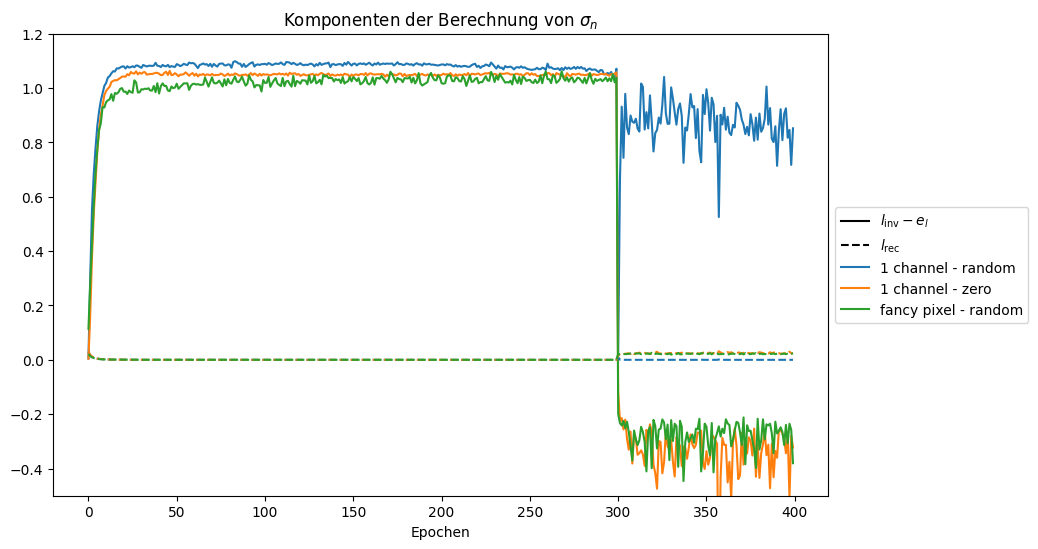

In [44]:
plt.figure(figsize=(10, 6))
colors = ['C0', 'C1', 'C2', 'C2', 'C4', 'C5', 'C6', 'C7']
#colors = ['#00d757', '#e69f00', '#f7eb4d', '#04bffc']#, '#ff77ff', '#ffadad', '#ff0000', '#000000']

config = "n2info-channel_1_random batchnorm"
x_axis = np.arange(0, len(lin_dict[config]["values"]), 1)
line1 = plt.plot(x_axis, np.subtract(lin_dict[config]["values"], e_l_dict[config]["values"]), color=colors[0], label='1 channel - random') #dunkelgrün
config = "n2info-channel_1_zero batchnorm_part3"
line2 = plt.plot(x_axis, np.subtract(lin_dict[config]["values"], e_l_dict[config]["values"]), color=colors[1], label='1 channel - zero') #orange
#config = "n2info-mischmasch-channel_1_zero batchnorm"
#x_axis_smal = np.arange(300, 300+len(lin_dict[config]["values"]), 1)
#line3 = plt.plot(x_axis_smal, np.subtract(lin_dict[config]["values"], e_l_dict[config]["values"]), color=colors[2], label='1 channel - random training') #Tgelb
config = "n2info-pixel random batchnorm fancy_1_13"
line4 = plt.plot(x_axis, np.subtract(lin_dict[config]["values"], e_l_dict[config]["values"]), color=colors[3], label='fancy pixel - random') #türkis

"""
for i, (config, data) in enumerate(lin_dict.items()):
    result = np.subtract(data["values"], e_l_dict[config]["values"])
    plt.plot(data["steps"], result, color=colors[i], label=f"r = {config[-1]}")
"""
for i, (config, data) in  enumerate(lex_dict.items()):
    if 'n2info-mischmasch-channel_1_zero batchnorm' in config:
        print('skip')
        continue
    plt.plot(data["steps"], data["values"], color=colors[i], linestyle='dashed', label=f"r = {config[-1]}")
    print(min(data["values"]))


#plt.yscale('log')
plt.ylim(-0.5,1.2)
plt.xlabel("Epochen")
#plt.ylabel("PSNR (Train)")
plt.title("Komponenten der Berechnung von $\sigma_n$")

solid_line = plt.Line2D([0], [0], color='black', linestyle='-', label='$l_{\\text{inv}} - e_{l}$')
dashed_line = plt.Line2D([0], [0], color='black', linestyle='--', label='$l_{\\text{rec}}$')
# Legende außerhalb des Plots platzieren
plt.legend(handles=[solid_line, dashed_line, line1[0], line2[0], line4[0]], loc='center left', bbox_to_anchor=(1, 0.5), ncol=1) # Position, Anzahl Spalten

plt.show()



7.799777449690737e-06
1.4572080544894561e-05
skip
3.5392126847000327e-06


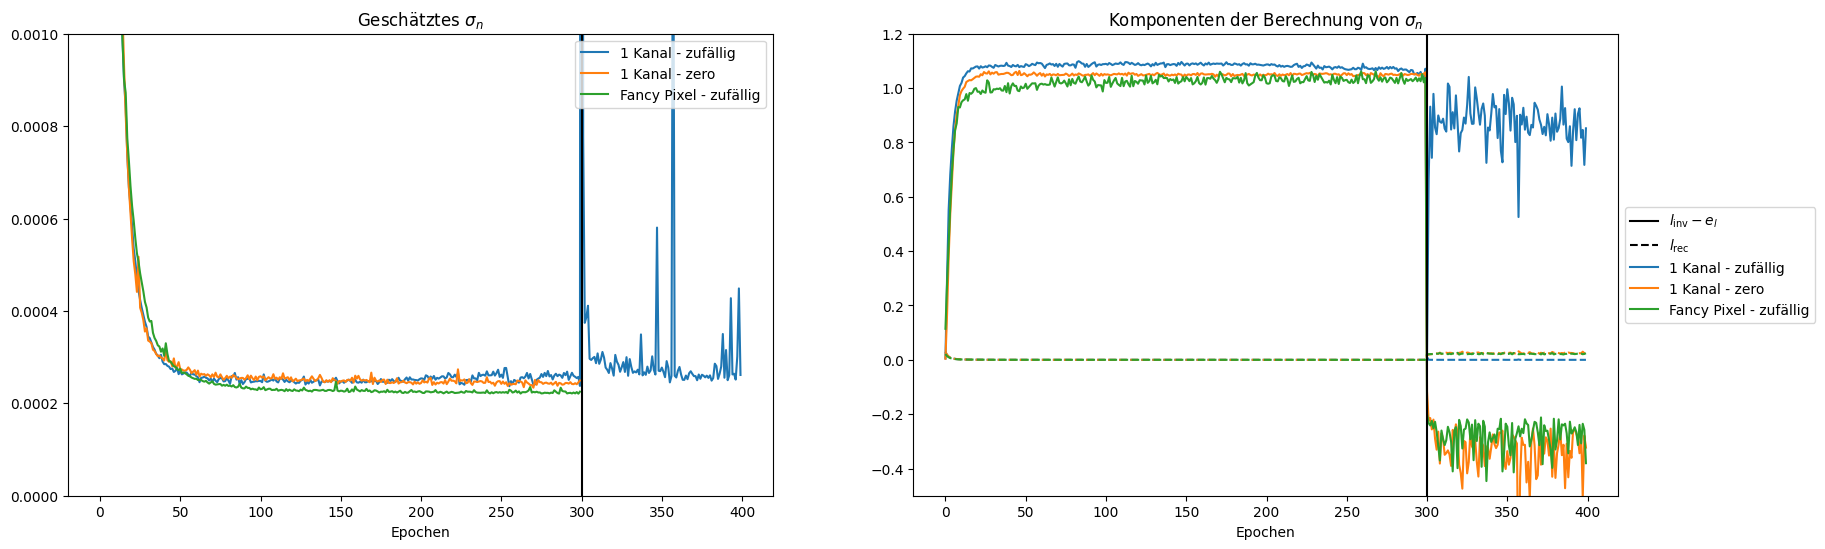

In [75]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))
colors = ['C0', 'C1', 'C2', 'C2', 'C4', 'C5', 'C6', 'C7']


config = "n2info-channel_1_random batchnorm"
ax1.plot(x_axis, estimated_sigma_dict[config]["values"], color=colors[0], label='1 Kanal - zufällig') #dunkelgrün
config = "n2info-channel_1_zero batchnorm_part3"
ax1.plot(x_axis, estimated_sigma_dict[config]["values"], color=colors[1], label='1 Kanal - zero') #orange
#config = "n2info-mischmasch-channel_1_zero batchnorm"
#x_axis_smal = np.arange(300, 300+len(estimated_sigma_dict[config]["values"]), 1)
#ax1.plot(x_axis_smal, estimated_sigma_dict[config]["values"], color=colors[2], label='1 channel - random training') #Tgelb
config = "n2info-pixel random batchnorm fancy_1_13"
ax1.plot(x_axis, estimated_sigma_dict[config]["values"], color=colors[3], label='Fancy Pixel - zufällig') #türkis

ax1.axvline(x=300, color='black', linestyle='-')
ax1.legend(loc='upper right')
ax1.set_title("Geschätztes $\sigma_n$")
ax1.set_xlabel("Epochen")
ax1.set_ylim(-0,0.001)


#------------rechts


#colors = ['#00d757', '#e69f00', '#f7eb4d', '#04bffc']#, '#ff77ff', '#ffadad', '#ff0000', '#000000']

config = "n2info-channel_1_random batchnorm"
x_axis = np.arange(0, len(lin_dict[config]["values"]), 1)
line1 = ax2.plot(x_axis, np.subtract(lin_dict[config]["values"], e_l_dict[config]["values"]), color=colors[0], label='1 Kanal - zufällig') #dunkelgrün
config = "n2info-channel_1_zero batchnorm_part3"
line2 = ax2.plot(x_axis, np.subtract(lin_dict[config]["values"], e_l_dict[config]["values"]), color=colors[1], label='1 Kanal - zero') #orange
#config = "n2info-mischmasch-channel_1_zero batchnorm"
#x_axis_smal = np.arange(300, 300+len(lin_dict[config]["values"]), 1)
#line3 = ax2.plot(x_axis_smal, np.subtract(lin_dict[config]["values"], e_l_dict[config]["values"]), color=colors[2], label='1 channel - random training') #Tgelb
config = "n2info-pixel random batchnorm fancy_1_13"
line4 = ax2.plot(x_axis, np.subtract(lin_dict[config]["values"], e_l_dict[config]["values"]), color=colors[3], label='Fancy Pixel - zufällig') #türkis


for i, (config, data) in  enumerate(lex_dict.items()):
    if 'n2info-mischmasch-channel_1_zero batchnorm' in config:
        print('skip')
        continue
    ax2.plot(data["steps"], data["values"], color=colors[i], linestyle='dashed', label=f"r = {config[-1]}")
    print(min(data["values"]))


#plt.yscale('log')
ax2.set_ylim(-0.5,1.2)
ax2.set_xlabel("Epochen")
#plt.ylabel("PSNR (Train)")
ax2.set_title("Komponenten der Berechnung von $\sigma_n$")
ax2.axvline(x=300, color='black', linestyle='-')

solid_line = plt.Line2D([0], [0], color='black', linestyle='-', label='$l_{\\text{inv}} - e_{l}$')
dashed_line = plt.Line2D([0], [0], color='black', linestyle='--', label='$l_{\\text{rec}}$')
# Legende außerhalb des Plots platzieren
ax2.legend(handles=[solid_line, dashed_line, line1[0], line2[0], line4[0]], loc='center left', bbox_to_anchor=(1, 0.5), ncol=1) # Position, Anzahl Spalten

plt.show()

In [67]:
config = "n2info-channel_1_random batchnorm"
dif = estimated_sigma_dict[config]["values"][300:]
print(min(dif))

0.00024526272318325937


In [69]:
config = "n2info-channel_1_random batchnorm"
timestemp = 100
#congig = ""
dif = lin_dict[config]["values"][timestemp] - e_l_dict[config]["values"][timestemp]
print("differnez ", dif)
dif = 21626880 * dif
print("sakllierte diff ", dif)
wurzel = np.sqrt(lex_dict[config]["values"][timestemp]**2 +dif)
print("Wurzel ", wurzel)
wurzel = wurzel/21626880
print("skallierte Wurzel ", wurzel)
print("endergebnis ", lex_dict[config]["values"][timestemp]+wurzel)
print(lex_dict[config]["values"][timestemp])

differnez  1.0892403058496711
sakllierte diff  23556869.385774136
Wurzel  4853.541942311216
skallierte Wurzel  0.00022442173546582847
endergebnis  0.0002483719378418281
2.3950202375999652e-05
